## Lógica Básica en Julia

In [1]:
#using Pkg; Pkg.add("Plots")
#using Pkg
#Pkg.add("Plots")
using Plots

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


**La una buena parte del código que se escribe no es para procesar números sino para tomar decisiones.**

Veamos un ejemplo. Asignando distintos valores a `a`y `b` obtenemos distintos resultados en la celda. Pruebe hasta que haya obtenido todos los resultados posibles.

In [11]:
# definición de variables
a = 0.5
b = 2

# con condicionales vemos como se comportan los operadores lógicos
if a > 1
    println("Hola")
elseif a == 1
    println("Chau")
elseif a < 1
    println("otra cosa")
else
    println("Que hago?")
end

println("ya termina el programa")

otra cosa
ya termina el programa


Qué es lo que sucede? Los operadores `>`, `<`y `==` son operadores lógicos. Es decir retornan *verdadero* (`true`) o *falso* (`false`) de acuerdo los valores que se les da.

In [12]:
a > b

false

In [13]:
2 > 1
>(2,1)

true

In [14]:
typeof(2>1)

Bool

Veamos que información tenemos sobre uno de ellos:

In [15]:
# le pedimos la documentación a julia del operador ">" con la macro @doc
@doc >

```
>(x, y)
```

Greater-than comparison operator. Falls back to `y < x`.

# Implementation

Generally, new types should implement [`<`](@ref) instead of this function, and rely on the fallback definition `>(x, y) = y < x`.

# Examples

```jldoctest
julia> 'a' > 'b'
false

julia> 7 > 3 > 1
true

julia> "abc" > "abd"
false

julia> 5 > 3
true
```

```
>(x)
```

Create a function that compares its argument to `x` using [`>`](@ref), i.e. a function equivalent to `y -> y > x`. The returned function is of type `Base.Fix2{typeof(>)}`, which can be used to implement specialized methods.

!!! compat "Julia 1.2"
    This functionality requires at least Julia 1.2.



In [16]:
"ab" > "aa"

true

In [19]:
"ab" > "bb"

false

**Vemos que `>` es realmente una función!** Más familiarmente la podemos expresar así:

In [20]:
>(3,2)

true

A nivel del compilador realiza una operación así: 

In [21]:
@code_llvm(>(1,2))


;  @ operators.jl:294 within `>'
define i8 @"julia_>_9851"(i64, i64) {
top:
; ┌ @ int.jl:49 within `<'
   %2 = icmp slt i64 %1, %0
; └
  %3 = zext i1 %2 to i8
  ret i8 %3
}


_notemos que nos devuelve un entero de 8 bits, es decir, una cadena de bits tal como nos dice el álgebra Booleana_
_True=1 y False=0_

Los valores del álgebra booleana, `true` y `false` se pueden convertir a los enteros `1` y `0` respectivamente. 

In [22]:
true * 5

5

In [24]:
false * 5

0

Veamos como podemos usar esta propiedad para definir funciones particulares y visualizar la acción de los operadores lógicos. Por ejemplo, la siguiente función pega una parábola negativa con otra positiva en $x=0$.

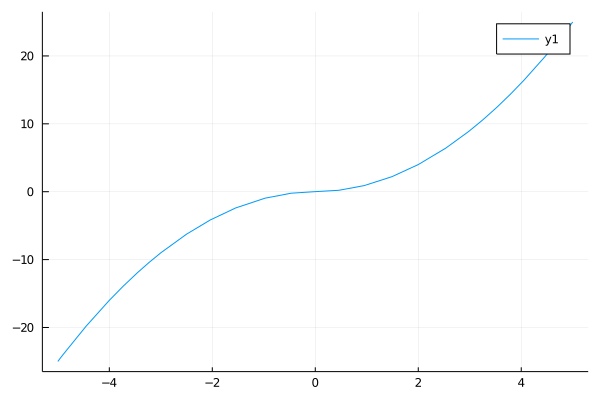

In [25]:
x0 = 0
f(x) = -(x < x0)*x^2 + (x >= x0)*x^2
plot(f)

### Ejercicio: 

Cómo construyo la función valor absoluto?

## Los operadores &&, || y !

Corresponden a los operadores, **y**, **o** y **negación**.

In [ ]:
true && true # and

In [ ]:
false || true # or

In [ ]:
!true

Podemos generar las tablas lógicas facilmente!

In [ ]:
A = (true, false)

And = [i && j for i in A, j in A]

In [ ]:
Or = [i || j for i in A, j in A]

In [ ]:
.!And .== Or

Para familiarizarnos con estos operadores podemos aplicarlos a la construcción de funciones simples:

In [ ]:
function g_e(x)
    if x >= 0 && x <= 1 return 1.
    else return 0
    end
end

In [ ]:
plot(g_e)

In [ ]:
g(x) = 1.0*(x >= 0 && x <=1)

In [ ]:
plot(g)

Cómo hacemos la función $h(\cdot)$ que vale 1 en todos lados excepto en el intervalo $[0,1]$ donde vale 1?

Notemos que $h(x) = 1 - g(x)$.

In [ ]:
h(x) = 1.0*(x < 0 || x >= 1)

In [ ]:
plot(h)

### Otros operadores que retornan tipos booleanos

In [ ]:
issubset([4,5], [4,5,6])

In [ ]:
[4,5] ⊆ [4,5,6] #\subseteq <tab>

In [ ]:
4 ∈ [3,4,5] # \in <tab> 

In [ ]:
4 ∈ [3,4,5]

In [ ]:
"hola" ∈ (1., 3, "hola", [1,2,3])

In [ ]:
in([4,6,5]).([4, 6]) # verdadero / falso dependiendo de si cada elemento del segundo conjunto está en el primero

In [ ]:
all(i->(4<=i<=6), [4,5,6])

In [ ]:
l = [true, true, false]
all(l)

In [ ]:
all(in([4,6,5]).([4, 7]))

In [ ]:
contains("hola que tal", "que")

In [ ]:
2. isa Int64

In [ ]:
2. isa Float64

In [ ]:
@doc in

## Símbolos

In [ ]:
1 + x

In [ ]:
f(x) = 1 + x

In [ ]:
verde = "verde"

In [ ]:
typeof(verde)

In [ ]:
typeof(:verde)

In [ ]:
:verde

In [ ]:
eval(:verde)

In [ ]:
s = :(1+x)

In [ ]:
typeof(s)

In [ ]:
using Symbolics

In [ ]:
@variables t

In [ ]:
(1+t)^2

In [ ]:
typeof(t)

In [ ]:
methods(^)